In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [30]:
l = os.listdir("./im")

In [31]:
l

['IMG-20200321-WA0006.jpg',
 'IMG_20200319_182736987.jpg',
 'IMG-20200321-WA0001.jpg',
 'IMG_20200321_105630537.jpg',
 'IMG_20200321_114627236.jpg',
 'IMG_20200321_114643373.jpg',
 'IMG-20200321-WA0009.jpg',
 'IMG-20200321-WA0005.jpg',
 'IMG_20200321_114611783.jpg',
 'IMG_20200321_112835223.jpg',
 'IMG_20200321_132940990.jpg',
 'IMG-20200321-WA0003.jpg',
 'IMG-20200321-WA0008.jpg',
 'IMG-20200321-WA0002.jpg',
 'IMG_20200319_201925161.jpg',
 'IMG-20200321-WA0004.jpg',
 'IMG-20200321-WA0007.jpg']

In [4]:
img = cv2.imread(f'./im/{l[-1]}',2)

In [185]:
image = Image.open(f'./im/{l[5]}')

In [186]:
image = image.convert('L')

In [187]:
image = np.array(image)

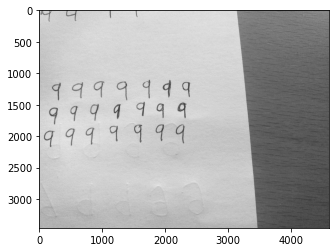

In [188]:
plt.imshow(image, cmap='gray')

In [9]:
image = image[550:]

In [913]:
image.min()

31

In [920]:
image[image < image.min()+20] = 0

In [921]:
image[image != 0] = 255

In [39]:
image = np.rot90(image)

In [189]:
n = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)[1]

In [190]:
thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)[1]

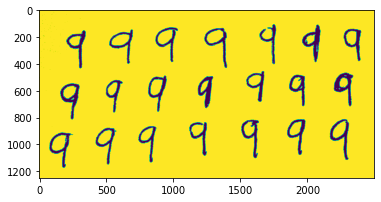

In [194]:
plt.imshow(n)

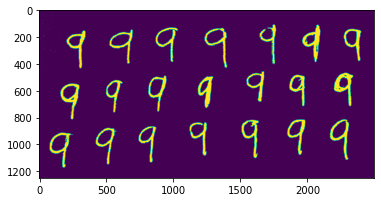

In [195]:
plt.imshow(thresh)

In [193]:
thresh = thresh[1000:2250, :2500]
n = n[1000:2250, :2500]

In [196]:
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [197]:
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
pi = []
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if w + h > 120:
        print(x, y, w, h)
        pi.append(n[y:y+h, x:x+w])

79 912 166 260
423 876 153 273
743 865 131 269
1123 836 129 248
1510 817 130 285
1852 814 136 264
2171 813 142 302
159 546 144 268
499 521 126 241
1185 493 114 236
815 489 139 267
1867 482 118 233
2201 467 144 249
1548 456 133 226
205 152 143 282
525 146 175 255
2274 140 130 241
1235 134 169 297
870 129 166 258
1964 110 136 277
1646 107 123 296


In [198]:
len(pi)

21

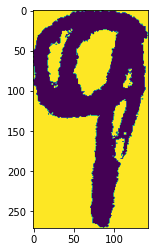

In [170]:
plt.imshow(pi[0])

In [109]:
pi = pi[:29]

In [199]:
y_true = np.full(21, 9)

In [200]:
p = pi.copy()
for i in range(len(p)):
    if p[i].shape[0] > p[i].shape[1]:
        zero = np.full((p[i].shape[0], int((p[i].shape[0] - p[i].shape[1])/2)), 255)
        p[i] = np.concatenate((zero, p[i]), axis=1)
        p[i] = np.concatenate((p[i], zero), axis=1)
    else:
        zero = np.full((int((p[i].shape[1] - p[i].shape[0])/2), p[i].shape[1]), 255)
        p[i] = np.concatenate((zero, p[i]), axis=0)
        p[i] = np.concatenate((p[i], zero), axis=0)

In [201]:
p[-1].shape

(296, 295)

In [202]:
res = []
for ps in p:
    res.append(cv2.resize(ps, dsize=(45, 45), interpolation= cv2.INTER_NEAREST))
res2 = res.copy()

In [203]:
from keras.models import load_model

In [204]:
m = load_model("100epochs.h5")

In [205]:
for i in range(len(res)):
    res[i] = res[i]/255
res = np.array(res)
res = res.reshape(len(res), 45, 45, 1)

In [206]:
m.predict_classes(res)

array([8, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 4, 4])

In [207]:
y_true

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

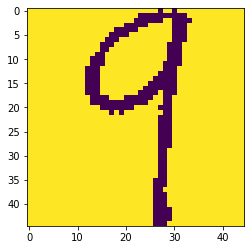

In [208]:
plt.imshow(res2[2])

In [209]:
from sklearn.metrics import accuracy_score

In [210]:
accuracy_score(y_true, m.predict_classes(res))

0.7142857142857143

In [183]:
res2[1]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

In [211]:
rot = 65
for i in res2:
    im = Image.fromarray(i)
    im.save(f'9/9_myimg_{rot}.png')
    rot +=1